In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.linear_model import LinearRegression

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [12]:
print("scp cbsu:/home2/ayh8/data/pausing_index/k562_pausing_index_centered_prediction.npz /Users/adamhe/github/scratch")

scp cbsu:/home2/ayh8/data/pausing_index/k562_pausing_index_centered_prediction.npz /Users/adamhe/github/scratch


In [13]:
data = np.load("/Users/adamhe/github/scratch/k562_pausing_index_centered_prediction.npz")
log_pausing_index = pd.DataFrame(
    {
        "pred": np.log1p(data["y_pred"]).squeeze(),
        "expt": np.log1p(data["y"]).squeeze(),
    }
)
#log_pausing_index.replace([np.inf, -np.inf], np.nan, inplace=True)
log_pausing_index.dropna(axis=0, inplace=True)

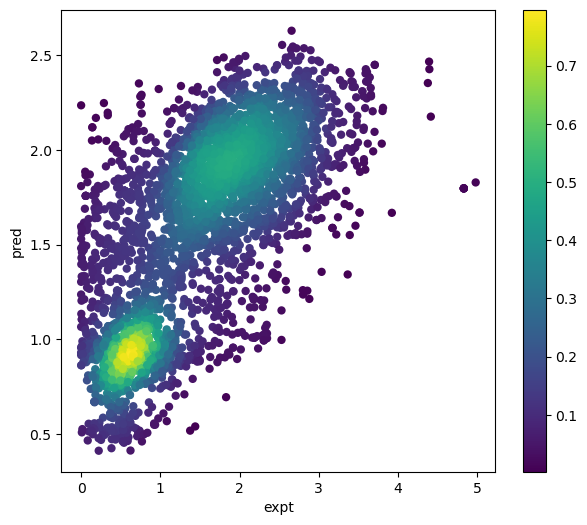

In [14]:
# Plot predicted vs observed log quantities

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
ax = sns.scatterplot(
    data=log_pausing_index,
    x="expt",
    y="pred",
    c=gaussian_kde(log_pausing_index.transpose())(log_pausing_index.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
fig.colorbar(ax.collections[0], ax=ax, orientation="vertical")
#ax.set_xlim(-3, 3)
#ax.set_ylim(-1.5, 1.5)
#ax.set_xticks([-0.5, 5.5])
#ax.set_xticklabels(["", ""])
#ax.set_yticks([-0.5, 5.5])
#ax.set_yticklabels(["", ""])
#ax.set_ylabel("Predicted initiation quantity")
#ax.set_xlabel("Observed initiation quantity")
#plt.savefig("img/log_pausing_index.pdf")

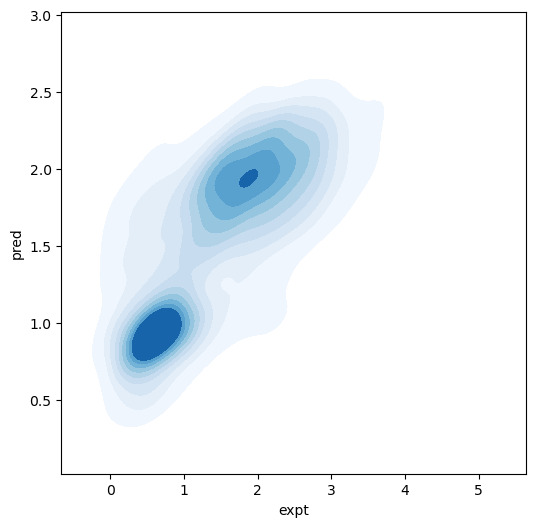

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
ax = sns.kdeplot(
    data=log_pausing_index,
    x="expt",
    y="pred",
    cmap="Blues",
    fill=True,
)

In [16]:
print(pearsonr(log_pausing_index.expt, log_pausing_index.pred))
print(spearmanr(log_pausing_index.expt, log_pausing_index.pred))
print(
    LinearRegression(fit_intercept=True).fit(
        log_pausing_index.expt.to_numpy().reshape(-1, 1),
        log_pausing_index.pred.to_numpy().reshape(-1, 1),
    ).coef_
)

PearsonRResult(statistic=0.6993837748293935, pvalue=0.0)
SignificanceResult(statistic=0.7068750908161102, pvalue=0.0)
[[0.41046949]]


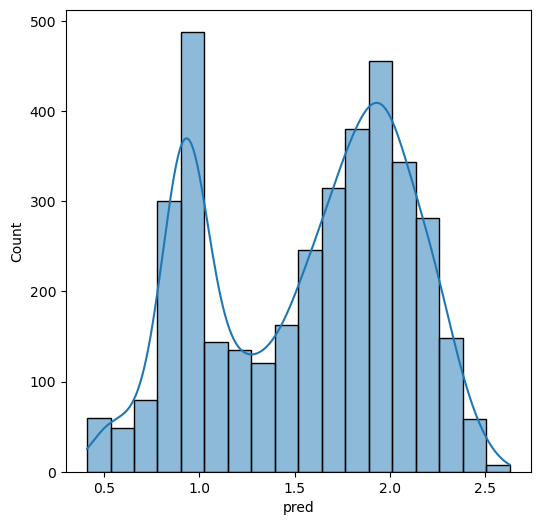

In [22]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
ax = sns.histplot(
    log_pausing_index.pred, kde=True
)

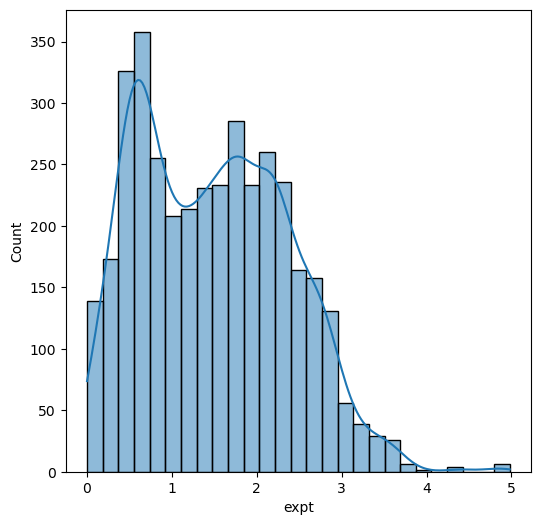

In [23]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
ax = sns.histplot(
    log_pausing_index.expt, kde=True
)

In [24]:
log_pausing_index.shape

(3771, 2)

In [25]:
log_pausing_index

,pred,expt
0,2.241132,2.251111
1,2.205274,2.251888
2,1.495154,0.932543
3,1.326231,0.850081
4,1.483030,0.851431
...,...,...
3766,1.436388,1.283061
3767,1.436388,1.283061
3768,1.407098,1.419801
3769,1.378307,0.866658
